In [ ]:
# Notebook3:
## Data Understanding and Preprocessing
## Cader Ali Zuhar Ahamed
## W2083592

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Import necessary libraries for ensemble classification
# (Reusing libraries covered in Seminar Session 6)
from sklearn.ensemble import VotingClassifier ## This class allows you to combine multiple different machine learning models
from sklearn.linear_model import LogisticRegression ## This is imported again (it was already imported earlier)
from sklearn.tree import DecisionTreeClassifier ## Imports the DecisionTreeClassifier class, used for building decision tree models
from sklearn.ensemble import RandomForestClassifier ## Imports the RandomForestClassifier class, used for building random forest models
import sklearn.preprocessing  ## Import the necessary submodule
from sklearn import preprocessing ## Import the preprocessing module
from sklearn.tree import DecisionTreeRegressor, plot_tree ## Imports the DecisionTreeRegressor class, used for building decision tree models for regression tasks (predicting continuous values)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error ## These functions are used to evaluate the performance of regression models
import matplotlib.pyplot as plt ## Matplotlib is a popular library for creating static, interactive, and animated visualizations in Python
import plotly.express as px ## import the library and give it an alias 'px'from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data= pd.read_csv('/content/drive/MyDrive/iit/Level05/ML and DM/CW /preprocessed_dataset.csv')

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined from previous notebooks
# Define base learners
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

In [ ]:
# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn)],
    voting='soft')

In [ ]:
## declaring the input variables and output variables
feature_cols = ['Age','Sex','Grade','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive']
x = data[feature_cols] ## Input features for classification
y = data['Mortality_Status'] ## Target variable
# Assuming your full dataset is stored in x and y
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3, random_state=42, stratify=y
)
# Train the ensemble model
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(x_test)
print('Ensemble Accuracy:', accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.8508845829823083
              precision    recall  f1-score   support

           0       0.56      0.05      0.09       179
           1       0.85      0.99      0.92      1008

    accuracy                           0.85      1187
   macro avg       0.71      0.52      0.51      1187
weighted avg       0.81      0.85      0.79      1187



In [ ]:
# Assuming 'Survival_Months' is the target variable for regression
# Extract features (X) and target (y) for regression
x_reg = data[feature_cols]  # Using the same feature columns as classification for now
y_reg = data['Survival_Months']  # Assuming 'Survival_Months' is your target variable

In [ ]:
# Split data into training and testing sets for regression
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x_reg, y_reg, test_size=0.2, random_state=42
)

In [ ]:
# Assuming X_train_reg, X_test_reg, y_train_reg, y_test_reg are preprocessed
# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(x_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Predict on test set
y_pred_reg = regressor.predict(x_test_reg)

In [ ]:
# Evaluate regression performance
print('MAE:', mean_absolute_error(y_test_reg, y_pred_reg))
print('MSE:', mean_squared_error(y_test_reg, y_pred_reg))
print('R2 Score:', r2_score(y_test_reg, y_pred_reg))

MAE: 19.875274267955287
MSE: 1153.9347960209075
R2 Score: -1.1288224501943915


In [ ]:
# Predictions
y_pred = ensemble_model.predict(x_test)
y_proba = ensemble_model.predict_proba(x_test)[:, 1]

In [ ]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[   9  170]
 [   7 1001]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.05      0.09       179
           1       0.85      0.99      0.92      1008

    accuracy                           0.85      1187
   macro avg       0.71      0.52      0.51      1187
weighted avg       0.81      0.85      0.79      1187



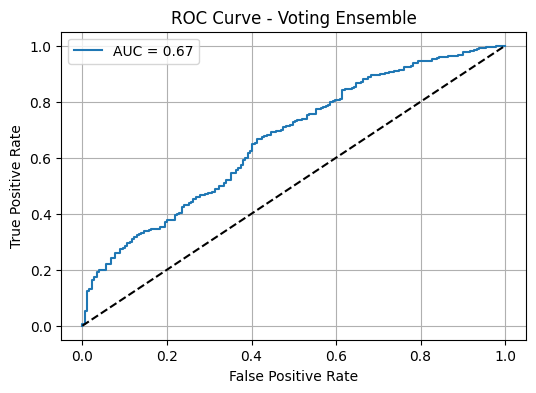

In [ ]:
# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Ensemble')
plt.legend()
plt.grid()
plt.show()

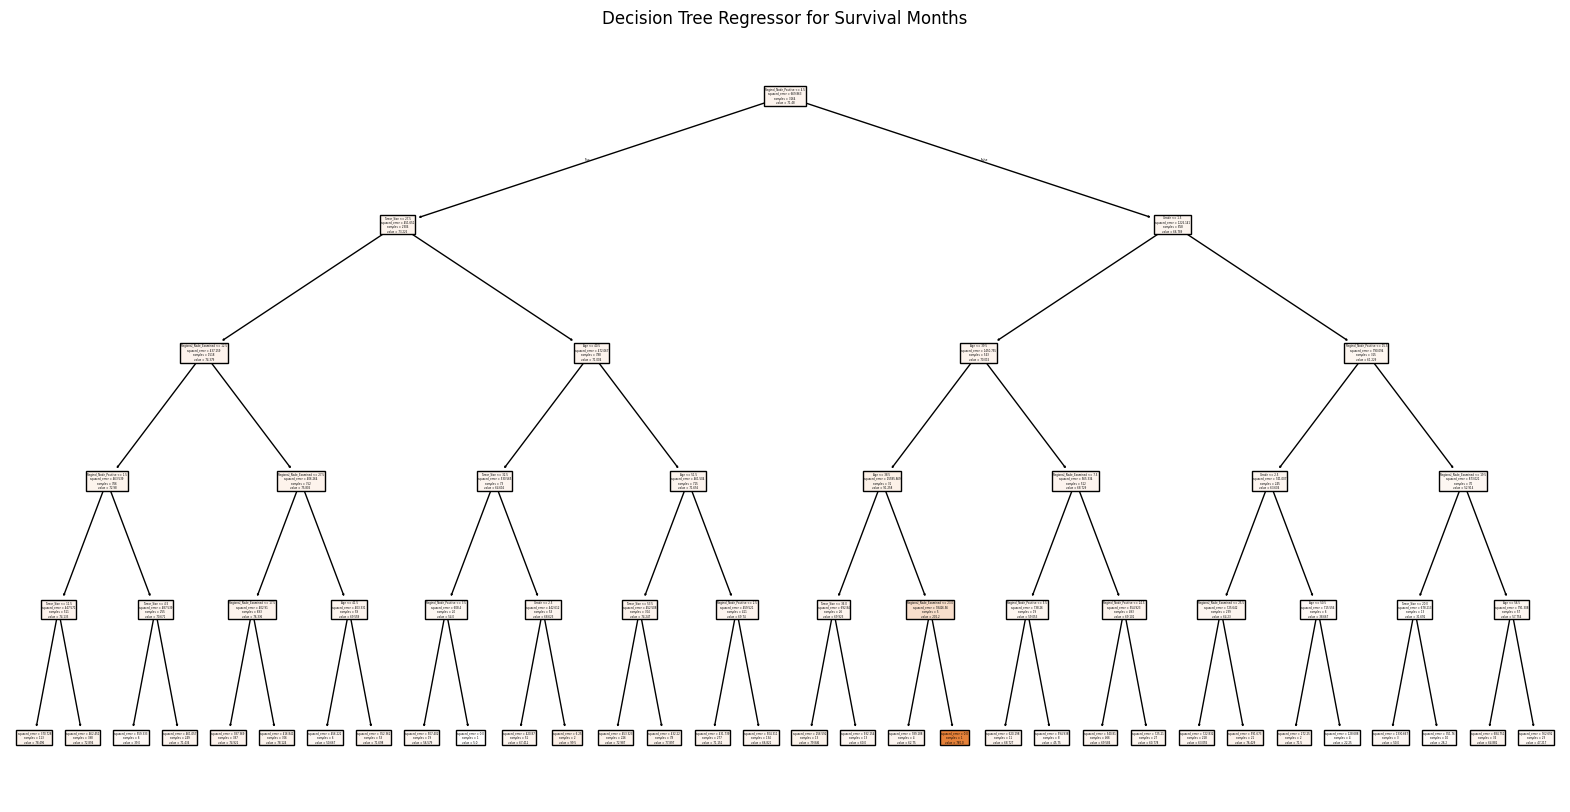

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=x_train_reg.columns)
plt.title('Decision Tree Regressor for Survival Months')
plt.show()

In [ ]:
patient_b002565 = pd.DataFrame({
    'Age': [55],
    'Sex': [1],
    'Grade': [3],
    'Tumor_Size': [40],
    'Regional_Node_Examined': [10],
    'Reginol_Node_Positive': [3]
})

In [ ]:
# Assuming 'regressor' is your best model based on previous cells
best_data_model = regressor
predicted_survival = best_data_model.predict(patient_b002565)
print("Predicted survival months for B002565:", predicted_survival[0])

Predicted survival months for B002565: 71.34162520729684


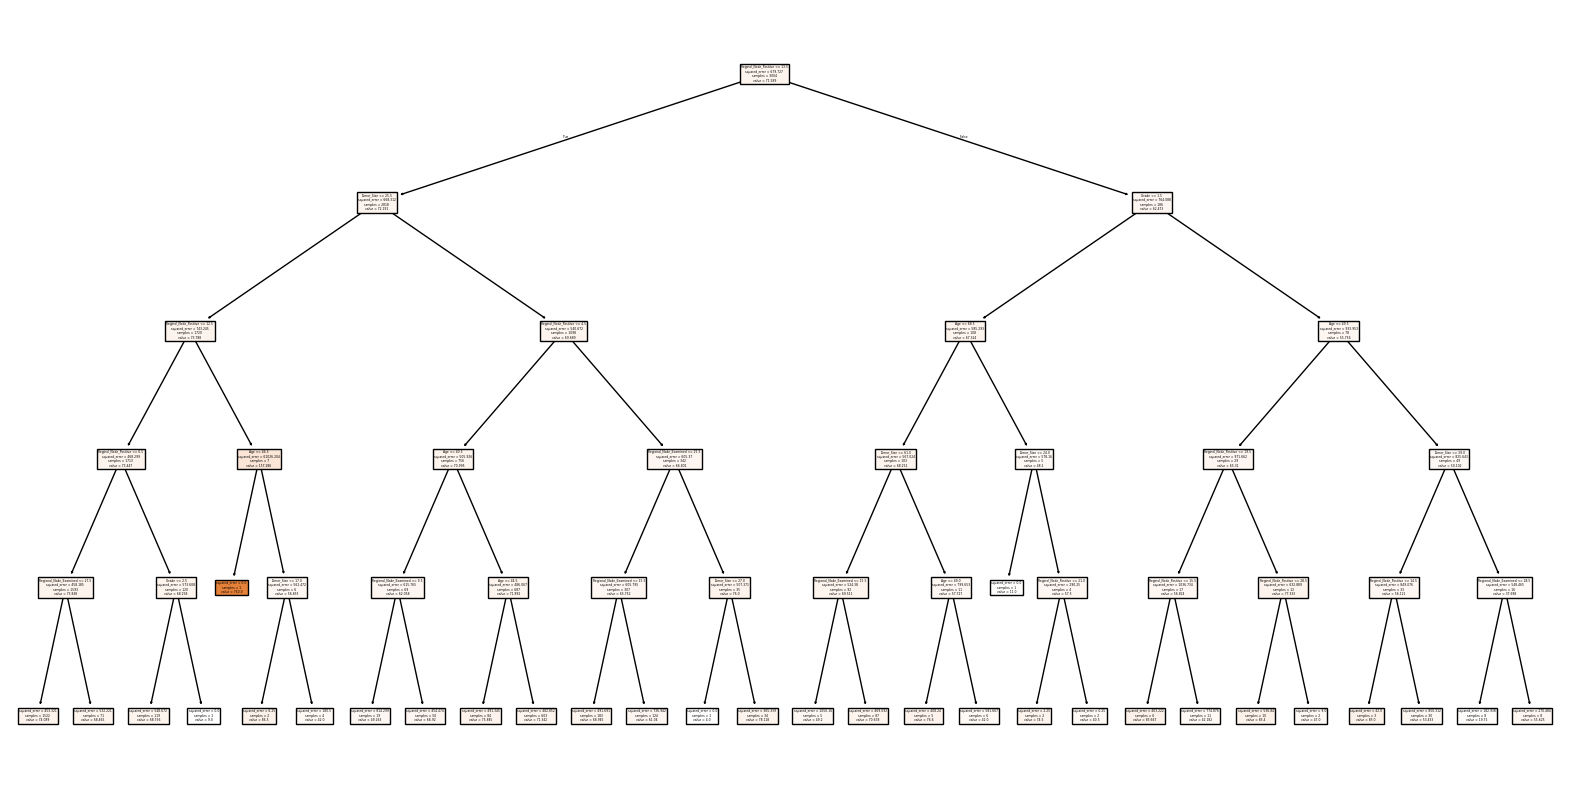

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_data_model, feature_names=patient_b002565.columns, filled=True)
plt.show()